# Outlier Detection

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy.linalg as la

# Regression with outliers

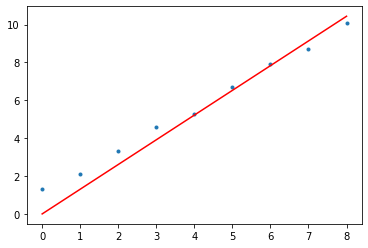

In [40]:
#regression example
y = [1.3,2.1, 3.3, 4.6,5.3, 6.7, 7.9,8.7,10.1]
x = np.arange(9)
x = x.reshape((len(x), 1))
b = la.inv(x.T.dot(x)).dot(x.T).dot(y)

yhat = x.dot(b)
plt.plot(x,y,'.')
plt.plot(x,yhat, 'r');

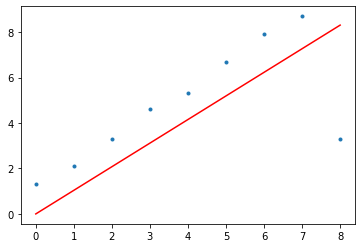

In [43]:
y = [1.3,2.1, 3.3, 4.6,5.3, 6.7, 7.9,8.7,3.3]
x = np.arange(9)
x = x.reshape((len(x), 1))
b = la.inv(x.T.dot(x)).dot(x.T).dot(y)

yhat = x.dot(b)
plt.plot(x,y,'.')
plt.plot(x,yhat, 'r')

 Regression has real issues with outliers

# PCA

[[ 0.   1.3]
 [ 1.   2.1]
 [ 2.   3.3]
 [ 3.   4.6]
 [ 4.   5.3]
 [ 5.   6.7]
 [ 6.   7.9]
 [ 7.   8.7]
 [ 8.  10.1]]


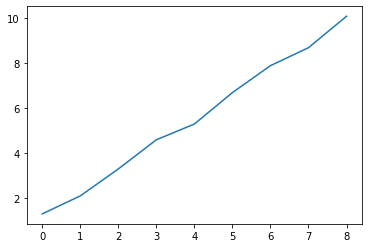

In [49]:
y = [1.3,2.1, 3.3, 4.6,5.3, 6.7, 7.9,8.7,10.1]
x = np.arange(9)
X = np.vstack([x,y]).T
print(X)
plt.plot(X[:,0], X[:,1], .)

In [3]:
def mc_max(n, m):
    """
    generates n numbers, records max value,
    m times,
    uses Gausian with mean 0 and stddev 1
    returns max value for each one in array
    """
    max_arr = []
    for i in range(m):
        max_arr.append(max(np.random.randn(n)))
    return np.array(max_arr)


In [4]:
def gumbel_density(m):
    """
    generates number for plot of gumbel distribution
    Fisher and Tippet 1928
    """
    x = np.linspace(0,5.5,80)
    mu = np.sqrt(2*np.log(m)) - ( (np.log(np.log(m)) + np.log(2*np.pi))/(2*np.sqrt(2*np.log(m))))
    beta = 1/(np.sqrt(2*np.log(m)))
    ym = (x - mu)/beta
    p =  (np.exp(-ym - np.exp(-ym)))/beta
    return x, p

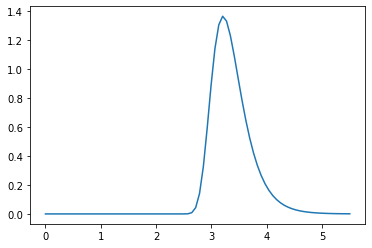

In [5]:
m=1000
x,p = gumbel_density(m)
plt.plot(x,p)

In [6]:
def generate_hist(n1, n2,m):
    mvs1 = mc_max(n1,m)
    mvs2 = mc_max(n2,m)
    ps = np.arange(m)
    bins = np.linspace(0,5.5, 80)
    plt.hist(mvs1, bins=bins, alpha=0.5, label='trials with n={}'.format(n1))
    plt.hist(mvs2, bins=bins, alpha=0.5, label='trials with n={}'.format(n2))
    x, p1 = gumbel_density(n1)
    x, p2 = gumbel_density(n2)
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('Counts of max values')
    plt.twinx()
    plt.plot(x, p1, 'r', label='n={}'.format(n1))
    plt.plot(x, p2, 'g', label='n={}'.format(n2))
    plt.ylabel('p(x|n)')

    plt.legend()
    fname = './images/weibull.png'
    plt.savefig(fname, bbox_inches = 'tight')
    plt.show()

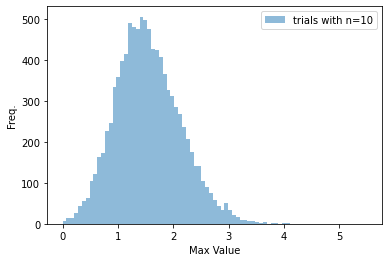

In [7]:
n1 = 10
m = 10000
mvs1 = mc_max(n1,m)
ps = np.arange(m)
bins = np.linspace(0,5.5, 80)
plt.hist(mvs1, bins=bins, alpha=0.5, label='trials with n={}'.format(n1));
plt.xlabel('Max Value')
plt.ylabel('Freq.')
plt.legend()
plt.show();

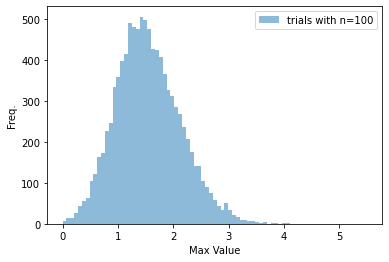

In [8]:
n2 = 100

mvs2 = mc_max(n2,m)
plt.hist(mvs1, bins=bins, alpha=0.5, label='trials with n={}'.format(n2));
plt.xlabel('Max Value')
plt.ylabel('Freq.')
plt.legend()
plt.show();

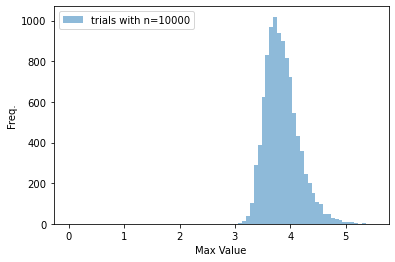

In [9]:
n3 = 10000
mvs2 = mc_max(n3,m)
plt.hist(mvs2, bins=bins, alpha=0.5, label='trials with n={}'.format(n3));
plt.xlabel('Max Value')
plt.ylabel('Freq.')
plt.legend()
plt.show();

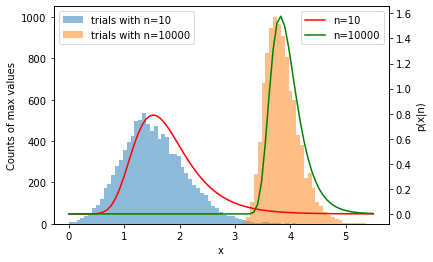

In [10]:
generate_hist(n1, n3,m)

# Modelling as single Gaussian

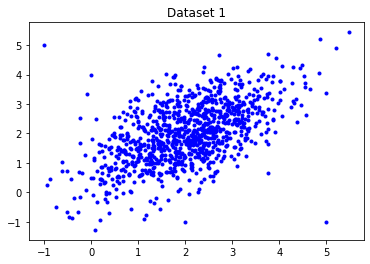

In [11]:
n=1000
#generate data sets to trial on. 
ds1 = np.random.multivariate_normal([2,2],[[1,0.6],[0.6,1]], n)
outs = [[2,-1],[5,-1],[0,4], [-1,5]]
g_outs = np.concatenate([ds1,outs])
plt.plot(g_outs[:,0], g_outs[:,1], 'b.')
plt.title('Dataset 1');

# Sensitivity to Outliers

NameError: name 'est_mu_cov' is not defined

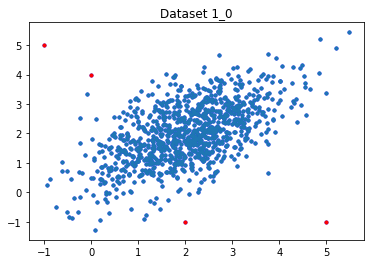

In [12]:

for i in range(4):
    fig = plt.figure()  # an empty figure with no axes
    ax = fig.add_subplot(1, 1, 1)
    # increase outlier
    outs = [[2,-1],[5,-1],[0,4], [-1-i,5+i]]
    g_outs = np.concatenate([ds1,outs])
    plt.plot(g_outs[:,0], g_outs[:,1], 'b.')
    plt.title(f'Dataset 1_{i}');
    X = g_outs
    plt.plot(X[:n,0], X[:n,1], '.')
    plt.plot(X[n:,0], X[n:,1], 'r.')
#     plt.title(f'Dataset {i+1}')
    mu, sig = est_mu_cov(X)
    min_x, min_y, max_x, max_y = X[:,0].min(), X[:,1].min(), X[:,0].max(),X[:,1].max()

    x_step, y_step = (max_x - min_x)/40, (max_y - min_y)/40
    x, y = np.mgrid[min_x-h:max_x+h:x_step, min_y-h:max_y+h:y_step]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mu, sig)
    plt.contourf(x, y, rv.pdf(pos), alpha=.3, cmap=plt.cm.Spectral)
    
    plt.colorbar()
    plt.savefig(f'./images/sense_gout{i+1}.png')
    plt.show()
    plt.close()

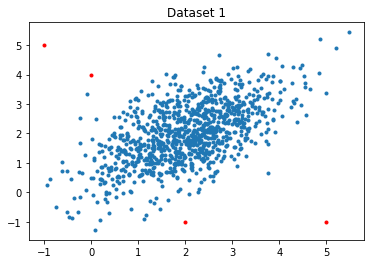

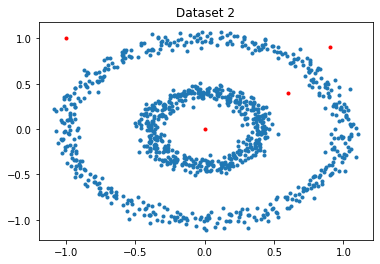

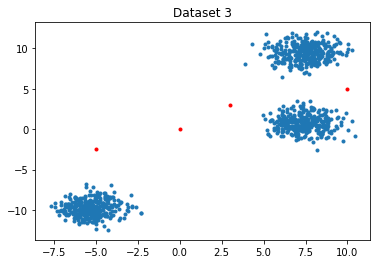

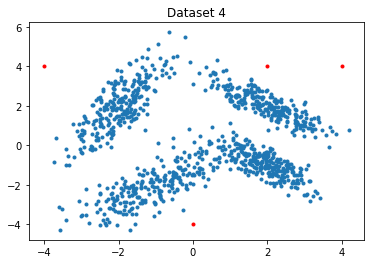

In [13]:
def est_mu_cov(X):
    """ assumes bivariate X, estimates mean and covariance should actually work for multi dimensional"""
    mu = np.mean(X, axis=0)
    Xmc = mean_norm(X)
    cov = np.dot(Xmc.T, Xmc)
    return mu, cov

def est_mu_cov_alt(X):
    """ assumes bivariate X, estimates mean and covariance"""
    mu = np.mean(X, axis=0)
    return mu, np.dot((X - mu).T,(X-mu))/X.shape[0]
    
def mean_norm(X):
    return (X - mu)/(np.max(X)-np.min(X))
from sklearn import datasets

circles = datasets.make_circles(n_samples=n, factor=0.4, noise=0.05)
outs = [[0,0], [-1, 1], [0.9,0.9], [0.6, 0.4]]
c_outs = np.concatenate([circles[0],outs])
moons = datasets.make_moons(n_samples=n, noise=0.05)
outs = [[-0.5,-0.25],[0.5,0.25],[1.4,0.5],[1.8,0.74]]
m_outs =np.concatenate([moons[0],outs])
blobs = datasets.make_blobs(n_samples=n, random_state=8)
outs = [[0,0], [-5, -2.5], [3,3], [10, 5]]
b_outs =np.concatenate([blobs[0],outs])
a1 = np.random.multivariate_normal([2,2],[[0.7,-0.6],[-0.6,.7]], n//4)
a2 = np.random.multivariate_normal([-2,2],[[0.5,0.8],[0.8,2]], n//4)
a3 = np.random.multivariate_normal([-1,-2],[[1,0.8],[0.8,1]], n//4)
a4 = np.random.multivariate_normal([2,-1],[[0.5,-0.4],[-0.4,0.5]], n//4)
outs = [[0,-4],[-4,4],[4,4],[2,4]]
aniso = np.concatenate([a1,a2,a3,a4, outs])
dsets = [g_outs, c_outs,b_outs, aniso]

for i in range(len(dsets)):
    dataset = dsets[i]
    plt.plot(dataset[:n,0], dataset[:n,1], '.')
    plt.plot(dataset[n:,0], dataset[n:,1], 'r.')
    plt.title(f'Dataset {i+1}')
    plt.savefig(f'./images/data_ds{i+1}.png')
    plt.show()

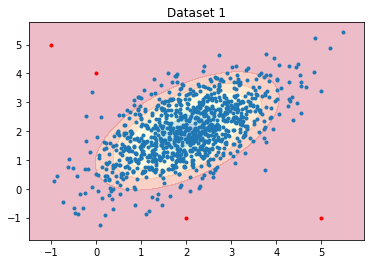

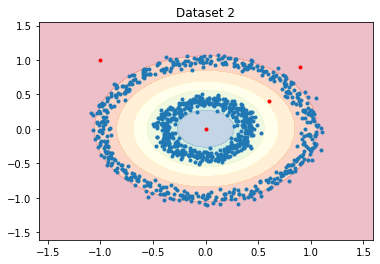

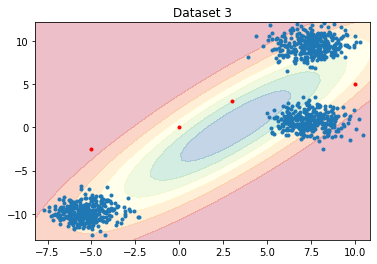

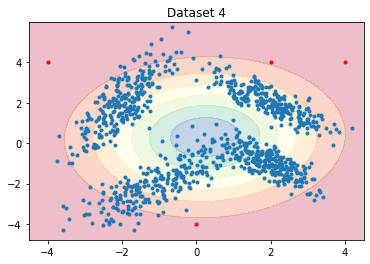

In [14]:

    
h = .5


for i in range(len(dsets)):
    fig = plt.figure()  # an empty figure with no axes
    ax = fig.add_subplot(1, 1, 1)
    X = dsets[i]
    plt.plot(X[:n,0], X[:n,1], '.')
    plt.plot(X[n:,0], X[n:,1], 'r.')
    plt.title(f'Dataset {i+1}')
    mu, sig = est_mu_cov_alt(X)
    min_x, min_y, max_x, max_y = X[:,0].min(), X[:,1].min(), X[:,0].max(),X[:,1].max()

    x_step, y_step = (max_x - min_x)/40, (max_y - min_y)/40
    x, y = np.mgrid[min_x-h:max_x+h:x_step, min_y-h:max_y+h:y_step]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mu, sig)
    CS = ax.contourf(x, y, rv.pdf(pos), alpha=.3, cmap=plt.cm.Spectral)
    plt.savefig(f'./images/singleg_ds{i+1}.png')
    plt.show()
    plt.close()

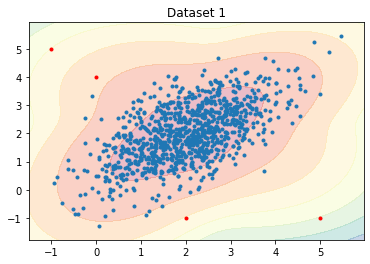

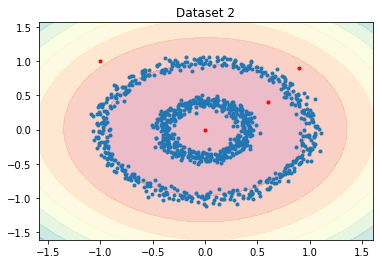

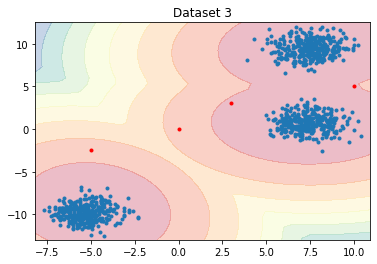

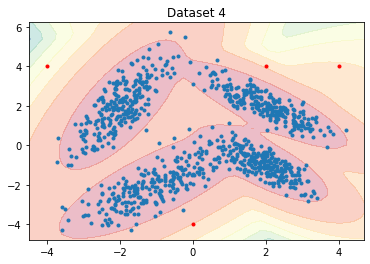

In [15]:
from sklearn.mixture import GaussianMixture
k=4
h=0.5
for i in range(len(dsets)):
    fig = plt.figure()  # an empty figure with no axes
    ax = fig.add_subplot(1, 1, 1)
    X = dsets[i]
    plt.plot(X[:n,0], X[:n,1], '.')
    plt.plot(X[n:,0], X[n:,1], 'r.')
    plt.title(f'Dataset {i+1}')
    clf = GaussianMixture(n_components=k)
    clf.fit(X)

    min_x, min_y, max_x, max_y = X[:,0].min()-h, X[:,1].min()-h, X[:,0].max()+h,X[:,1].max()+h
    xn = np.linspace(min_x, max_x, 40)
    yn = np.linspace(min_y, max_y, 40)
    xx,yy = np.meshgrid(xn, yn)
    Z = clf.score_samples(np.c_[xx.ravel(), yy.ravel()])*-1 # returns log probs for data
    zz = Z.reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=.3, cmap=plt.cm.Spectral)
    plt.savefig(f'./images/gmm_ds{i+1}.png')
    plt.show()
    plt.close()

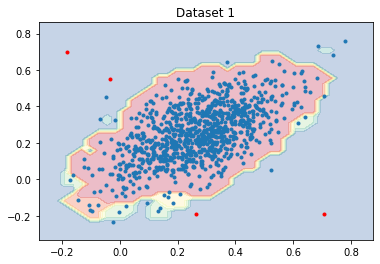

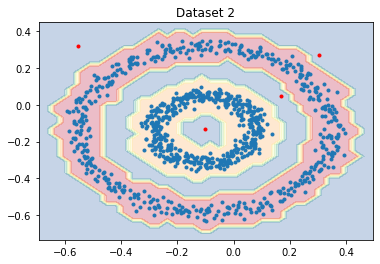

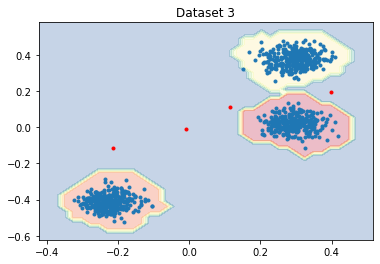

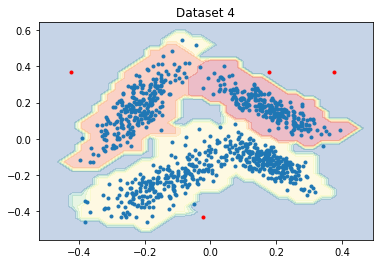

In [16]:
from sklearn.cluster import DBSCAN
eps = 0.05
minnum=3
h=0.1
for i in range(len(dsets)):
    fig = plt.figure()  # an empty figure with no axes
    ax = fig.add_subplot(1, 1, 1)
    X = mean_norm(dsets[i])
#     X = dsets[i]
    plt.plot(X[:n,0], X[:n,1], '.')
    plt.plot(X[n:,0], X[n:,1], 'r.')
    plt.title(f'Dataset {i+1}')

    min_x, min_y, max_x, max_y = X[:,0].min()-h, X[:,1].min()-h, X[:,0].max()+h,X[:,1].max()+h
    xn = np.linspace(min_x, max_x, 40)
    yn = np.linspace(min_y, max_y, 40)
    xx,yy = np.meshgrid(xn, yn)
    
    clf = DBSCAN(eps=eps, min_samples=minnum)
    zz = np.zeros_like(xx)
    for j in range(40):
        for k in range(40):
            X_a = np.concatenate([X,[[xn[j],yn[k]]]])
            classes = clf.fit_predict(X_a)
            n_cls = len(np.unique(classes))
            os = [n_cls if x<0 else x for x in classes]
            zz[k][j] = os[-1]

    plt.contourf(xx, yy, zz, alpha=.3, cmap=plt.cm.Spectral)
    plt.savefig(f'./images/dbscan_ds_norm{i+1}.png')
    plt.show()
    plt.close()
    

In [27]:
from gmm01a import init_pi_mu_sigma, expectation_step, maximisation_step, is_converged

In [28]:
# def init_pi_mu_sigma(X, K):
#     """
#     returns initial values for mu and sigma for each of k clusters
#     takes n vals (here 4) and finds mean and their mean and covariance.
#     X is n samples by m features
#     take one sample. Find nearest neighbour. Use to calculate mean and covariance.
#     need to normalise pi
#     """

#     mus = []
#     pis = []
#     sigs = []
#     x_range = np.arange(X.shape[0])
#     choices = np.random.choice(x_range, K, replace=False)
#     for i in range(K):
#         sample = X[choices[i],:]
#         nearest_n = find_nearest_neighbour(X, sample)
#         samples = np.array([sample, nearest_n])
#         mu = est_mean(samples)
#         pi = est_pi(samples, mu, X)
#         sigma = np.array([[.1,0.01],[0.01,.1]])
#     return mus, pis, sigs
        
# def expectation_step(pi_mu_sigs):
#         #expectation
#         prob_arr = []
#         for x in X:
#             p_x_c = []
#             for pi, mu, sig in pi_mu_sigs:
#                 rv = multivariate_normal(mu, sig)
#                 p_x_c.append(multi_gaussian(x, mu, sig))
#             p_x_c = normalise(p_x_c)
#             prob_arr.append(p_x_c)

#         prob_arr = np.array(prob_arr)
#         return prob_arr

# def maximisation_step(prob_arr, K, N):
#     """
#     using http://ethen8181.github.io/machine-learning/clustering/GMM/GMM.html
#     to help
#     """
#     #maximisation
#     mass_c = np.sum(prob_arr, axis=0)
#     pi_c = [m_c/N for m_c in mass_c]
#     mu_c = np.dot(prob_arr.T, X)
#     for i in range(K):
#         mu_c[i,:]/mass_c[i]
#     sigma_c = []
#     for k in range(K):
#         diff = (X - mu_c[k]).T
#         weight_sum = np.dot(prob_arr[:,k] * diff, diff.T)
#         sigma_c.append(weight_sum / mass_c[k])
#     pi_mu_sigs = list(zip(pi_c, mu_c, sigma_c))
#     return pi_mu_sigs

# def is_converged(pi_mu_sigs_new, pi_mu_sigs_old, eps, K):
#     for pi, mu, sig in pi_mu_sigs_new:
#         print(pi, mu, sig)

#     for i in range(K):
#         pn, mn, sn = pi_mu_sigs_new[i]
#         po, mo, so = pi_mu_sigs_old[i]
#         # print(pn, mn, sn)
#         if pn - po > eps:
#             return False
#         for j in range(len(mn)):
#             if abs(mn[i] - mo[i]) > eps:
#                 return  False
#         for k in range(len(so)):
#             for m in range(len(so[k])):
#                 if abs(sn[k,m] - so[k,m]) > eps:
#                     return False

#         return True

In [37]:
mean_1 = np.array([0.5,0])
mean_2 = np.array([1.5,1.5])
mean_3 = np.array([-1,1])

n1 = 100
n2 = 80
n3 = 90
import numpy.linalg as la
synth_data_1 = np.random.randn(n1,2) #normal
synth_data_2 = np.random.randn(n2,2)
synth_data_3 = np.random.randn(n3,2)

C_1 = [[1,0.98],[0.98,1]]
A_1 = la.cholesky(C_1)

C_2 = [[1,0.98],[-0.98,1]]
A_2 = la.cholesky(C_2)

C_3 = [[1,-0.98],[0.98,1]]
A_3 = la.cholesky(C_3)

X_1 = np.dot(synth_data_1, A_1) + mean_1
X_2 = np.dot(synth_data_2, A_2)/1.5 + mean_2
X_3 = np.dot(synth_data_3, A_3)/2 + mean_3


X = np.concatenate([X_1, X_2, X_3], axis=0)
n = 3
h = .5

min_x = X[:,0].min()
min_y = X[:,1].min()
max_x = X[:,0].max()
max_y = X[:,1].max()
x_step = (max_x - min_x)/40
y_step = (max_y - min_y)/40
x, y = np.mgrid[min_x-h:max_x+h:x_step, min_y-h:max_y+h:y_step]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y





(-1.0075847859565008, 2.2981887279365134)

In [1]:

fig = plt.figure()  # an empty figure with no axes
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(min_x-h, max_x+h)
ax.set_ylim(min_y-h, max_y+h)

def make_frames(X, K):
    """
    
    """

    title = 'GMM iteration '
    pi_mu_sigs = init_pi_mu_sigma(X, K)
    iter_count=0
    eps = 0.001
    conv=False
    
    print(iter_count)
    while not conv:
        iter_count +=1
        N = X.shape[0]
        plt.plot(X[:100,0],X[:100,1],'g.')
        plt.plot(X[100:199,0],X[100:199,1],'r.')
        plt.plot(X[200:299,0],X[200:299,1],'m.')
        print(len(ax.get_children()))
        if iter_count>1:
            for artist in ax.get_children()[:-14]:
                artist.remove()
        # print(ax.get_children())
        # print(len(ax.get_children()))
        for pi, mu, sig in pi_mu_sigs:
            rv = multivariate_normal(mu, sig)
            plt.contour(x, y, rv.pdf(pos), alpha=.3, cmap=plt.cm.Spectral)
        plt.title(f'GMM iter {iter_count}')
        plt.savefig(f'./images/gmm_ani_fig_{iter_count}.png')
        plt.show()
            # plt.contour(x, y, rv.pdf(pos))


        prob_arr = expectation_step(X, pi_mu_sigs)
        pi_mu_sigs_new = maximisation_step(X, prob_arr, K, N)
        title_i = title + str(iter_count)
        ax.set_title(title_i)


        if is_converged(pi_mu_sigs, pi_mu_sigs_new, eps):
            ax.annotate("Converged", (-2, 2))
            print('converged')
            conv = True
        pi_mu_sigs = pi_mu_sigs_new

# X = dsets[i]
make_frames(X, 3)

NameError: name 'plt' is not defined